In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import dates

df = pd.read_csv('../../data/reviews/reviews_raw.csv')
df

,Company,Header,Review,Rating,Name,Location,Date
0,wpengine.com,Straight forward and easy to make edits,Our webmaster set up our new website on WP Eng...,4 stars: Great,Peter Fenwick,Australia,2021-01-12 23:40:12+00:00
1,wpengine.com,Not as FAST as advertised,Not as FAST as advertised. The Free templates ...,3 stars: Average,Dean,United States,2021-01-11 11:10:20+00:00
2,wpengine.com,Extremely satisfied with consistent quality se...,In the three years that I've been a WPEngine u...,5 stars: Excellent,Lisa,South Africa,2021-01-10 10:17:31+00:00
3,wpengine.com,We loved the support but found the…,We loved the support but found the Multisite s...,4 stars: Great,Hitesh,Ireland,2021-01-07 10:07:34+00:00
4,wpengine.com,nobackflow.wpengine.com/,nobackflow.wpengine.com all helpful links gone...,1 star: Bad,Mister Phoenix,United States,2021-01-02 18:01:50+00:00
...,...,...,...,...,...,...,...
481,kinsta.com,The Fastest Platform with the Most Helpful Sup...,I'm not exaggerating when I say that Kinsta wi...,5 stars: Excellent,Dave Warfel,United States,2018-09-17 17:47:48+00:00
482,kinsta.com,I really love your service,"I really love your service, we are using wooco...",5 stars: Excellent,Trần Mạnh Hùng,Vietnam,2018-09-12 07:06:27+00:00
483,kinsta.com,Everything I was hoping for!,So far Kinsta has been everything I was hoping...,5 stars: Excellent,Ashley Mann,United States,2018-09-09 14:15:08+00:00
484,kinsta.com,I am so happy I made the switch,I am so happy I made the switch. Their chat fu...,4 stars: Great,Jeff Yas,United States,2018-09-06 12:16:46+00:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   486 non-null    object
 1   Header    486 non-null    object
 2   Review    476 non-null    object
 3   Rating    486 non-null    object
 4   Name      486 non-null    object
 5   Location  486 non-null    object
 6   Date      486 non-null    object
dtypes: object(7)
memory usage: 26.7+ KB


In [16]:
duplicateDFRow = df[df.duplicated()]
len(duplicateDFRow)

0

In [17]:
df.isnull().any()

Company     False
Header      False
Review       True
Rating      False
Name        False
Location    False
Date        False
dtype: bool

In [18]:
df[df.isnull().any(axis=1)]

,Company,Header,Review,Rating,Name,Location,Date
49,wpengine.com,Excellent services and superb support.,NaN,5 stars: Excellent,Kunal Pandey,India,2020-11-20 10:15:51+00:00
170,kinsta.com,Great job so far!,NaN,5 stars: Excellent,Chris Connolly,United States,2021-01-03 19:42:48+00:00
291,kinsta.com,best WordPress service in the world!,NaN,5 stars: Excellent,Jason S,Japan,2019-11-07 05:58:36+00:00
351,kinsta.com,Great to work with!,NaN,5 stars: Excellent,stewart strange,United States,2019-08-12 13:57:35+00:00
358,kinsta.com,Super fast and great support,NaN,5 stars: Excellent,Michael Usov,Australia,2019-08-05 07:12:00+00:00
391,kinsta.com,Excellent service!,NaN,5 stars: Excellent,Max,Finland,2019-06-18 07:47:30+00:00
407,kinsta.com,Great support and fast servers,NaN,5 stars: Excellent,René Sejling,Denmark,2019-05-28 04:12:45+00:00
408,kinsta.com,"Interface ergonomique, service top, et surtout...",NaN,5 stars: Excellent,Amaury,France,2019-05-20 14:13:46+00:00
423,kinsta.com,Very happy with the product and support.,NaN,5 stars: Excellent,Paul McManus,Australia,2019-04-02 23:06:57+00:00
479,kinsta.com,One of the best WordPress Hosting ever.,NaN,5 stars: Excellent,Jazib Zaman,Pakistan,2018-09-23 20:21:34+00:00


Some reviews have null values which is acceptable since not everyone
adds review content.

In [19]:
# Convert ratings to integers
df['Rating_val'] = df['Rating'].str[0].astype(int)
df['Rating_val']
df.drop(columns=['Rating'], inplace=True)

In [20]:
# Options to break a date value into it's parts using DateTimeIndex
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# df['Year'] = pd.DatetimeIndex(df['Date']).year
# df['Month'] = pd.DatetimeIndex(df['Date']).month
# df['Month_Year'] = pd.to_datetime([f'{m}-{y}' for y, m in zip(df.Year, df.Month)])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Company     486 non-null    object             
 1   Header      486 non-null    object             
 2   Review      476 non-null    object             
 3   Name        486 non-null    object             
 4   Location    486 non-null    object             
 5   Date        486 non-null    datetime64[ns, UTC]
 6   Rating_val  486 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 26.7+ KB


In [21]:
df

,Company,Header,Review,Name,Location,Date,Rating_val
0,wpengine.com,Straight forward and easy to make edits,Our webmaster set up our new website on WP Eng...,Peter Fenwick,Australia,2021-01-12 23:40:12+00:00,4
1,wpengine.com,Not as FAST as advertised,Not as FAST as advertised. The Free templates ...,Dean,United States,2021-01-11 11:10:20+00:00,3
2,wpengine.com,Extremely satisfied with consistent quality se...,In the three years that I've been a WPEngine u...,Lisa,South Africa,2021-01-10 10:17:31+00:00,5
3,wpengine.com,We loved the support but found the…,We loved the support but found the Multisite s...,Hitesh,Ireland,2021-01-07 10:07:34+00:00,4
4,wpengine.com,nobackflow.wpengine.com/,nobackflow.wpengine.com all helpful links gone...,Mister Phoenix,United States,2021-01-02 18:01:50+00:00,1
...,...,...,...,...,...,...,...
481,kinsta.com,The Fastest Platform with the Most Helpful Sup...,I'm not exaggerating when I say that Kinsta wi...,Dave Warfel,United States,2018-09-17 17:47:48+00:00,5
482,kinsta.com,I really love your service,"I really love your service, we are using wooco...",Trần Mạnh Hùng,Vietnam,2018-09-12 07:06:27+00:00,5
483,kinsta.com,Everything I was hoping for!,So far Kinsta has been everything I was hoping...,Ashley Mann,United States,2018-09-09 14:15:08+00:00,5
484,kinsta.com,I am so happy I made the switch,I am so happy I made the switch. Their chat fu...,Jeff Yas,United States,2018-09-06 12:16:46+00:00,4


In [22]:
df_wp = df.loc[df['Company'] == 'wpengine.com']
df_wp

,Company,Header,Review,Name,Location,Date,Rating_val
0,wpengine.com,Straight forward and easy to make edits,Our webmaster set up our new website on WP Eng...,Peter Fenwick,Australia,2021-01-12 23:40:12+00:00,4
1,wpengine.com,Not as FAST as advertised,Not as FAST as advertised. The Free templates ...,Dean,United States,2021-01-11 11:10:20+00:00,3
2,wpengine.com,Extremely satisfied with consistent quality se...,In the three years that I've been a WPEngine u...,Lisa,South Africa,2021-01-10 10:17:31+00:00,5
3,wpengine.com,We loved the support but found the…,We loved the support but found the Multisite s...,Hitesh,Ireland,2021-01-07 10:07:34+00:00,4
4,wpengine.com,nobackflow.wpengine.com/,nobackflow.wpengine.com all helpful links gone...,Mister Phoenix,United States,2021-01-02 18:01:50+00:00,1
...,...,...,...,...,...,...,...
161,wpengine.com,Better WordPress Hosting Than Rackspace,WP Engine has made our sites faster and more s...,Alex Champagne,United States,2016-03-11 00:12:52+00:00,5
162,wpengine.com,"Great product, great team.",I can't say enough good things about WP Engine...,Sean Dolan,United States,2016-03-10 22:16:20+00:00,5
163,wpengine.com,A great choice for Wordpress sites,My job is maximizing the revenue that business...,Brian Massey,United States,2016-03-04 22:27:00+00:00,5
164,wpengine.com,We should have moved to WP Engine sooner,"We run a conference and all sponsorships, regi...",Shawn Collins,United States,2016-02-29 14:26:14+00:00,5


In [23]:

df_kin = df.loc[df['Company'] == 'kinsta.com']
df_kin

,Company,Header,Review,Name,Location,Date,Rating_val
166,kinsta.com,Formidable !,Je ne connaissais pas ce genre d'hébergement i...,ALAIN BONATI,France,2021-01-11 10:25:58+00:00,5
167,kinsta.com,Tsohost to Kinsta best move ever,I have moved to Kinsta from Tsohost a month ag...,Olivia,United Kingdom,2021-01-10 10:36:14+00:00,5
168,kinsta.com,Selon moi le meilleur hébergement…,Selon moi le meilleur hébergement wordpress du...,createur de site,France,2021-01-08 16:52:57+00:00,5
169,kinsta.com,Really great hosting service for wordpress,"Really great hosting service, you can be focus...",Etienne Voilliot,France,2021-01-04 08:56:46+00:00,5
170,kinsta.com,Great job so far!,NaN,Chris Connolly,United States,2021-01-03 19:42:48+00:00,5
...,...,...,...,...,...,...,...
481,kinsta.com,The Fastest Platform with the Most Helpful Sup...,I'm not exaggerating when I say that Kinsta wi...,Dave Warfel,United States,2018-09-17 17:47:48+00:00,5
482,kinsta.com,I really love your service,"I really love your service, we are using wooco...",Trần Mạnh Hùng,Vietnam,2018-09-12 07:06:27+00:00,5
483,kinsta.com,Everything I was hoping for!,So far Kinsta has been everything I was hoping...,Ashley Mann,United States,2018-09-09 14:15:08+00:00,5
484,kinsta.com,I am so happy I made the switch,I am so happy I made the switch. Their chat fu...,Jeff Yas,United States,2018-09-06 12:16:46+00:00,4


In [24]:
plt.style.use('dark_background')

def plot_rating_distribution(data, company):
	sns.countplot(data['Rating_val'])
	plt.title(f'{company} Rating Distribution')
	plt.ylabel('Reviews')
	plt.xlabel('Rating')
	plt.show()

/usr/local/anaconda3/envs/12-days-web-scraper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/12-days-web-scraper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


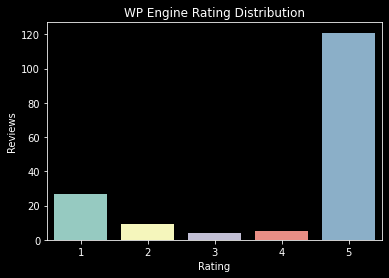

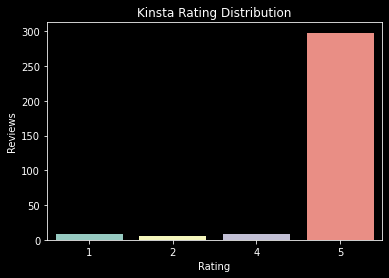

In [25]:
plot_rating_distribution(df_wp, 'WP Engine')
plot_rating_distribution(df_kin, 'Kinsta')

/usr/local/anaconda3/envs/12-days-web-scraper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


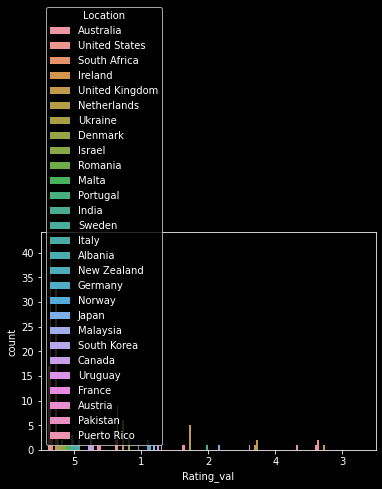